<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Get-a-better-general-picture-of-this-dataset’s-missing-values,-underlying-population-bias" data-toc-modified-id="Get-a-better-general-picture-of-this-dataset’s-missing-values,-underlying-population-bias-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Get a better general picture of this dataset’s missing values, underlying population bias</a></span><ul class="toc-item"><li><span><a href="#Missing-Values" data-toc-modified-id="Missing-Values-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Missing Values</a></span><ul class="toc-item"><li><span><a href="#What-is-the-age-distribution-of-CTB==1?" data-toc-modified-id="What-is-the-age-distribution-of-CTB==1?-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>What is the age distribution of CTB==1?</a></span></li></ul></li><li><span><a href="#Characteristics-of-Patients-in-the-Baseline" data-toc-modified-id="Characteristics-of-Patients-in-the-Baseline-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Characteristics of Patients in the Baseline</a></span></li></ul></li><li><span><a href="#use-literature-review-predictors-in-the-model" data-toc-modified-id="use-literature-review-predictors-in-the-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>use literature review predictors in the model</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [203]:
pd.options.display.max_rows = 400
pd.options.display.max_columns = 50

In [3]:
%cd datasets

/Users/jinchenxie/Desktop/HF_Research/datasets


In [4]:
baseline = pd.read_excel('HF-Baseline.xlsx', '00480_Baseline_20200115_NA')
admission = pd.read_excel('HF-Admissions.xlsx', '00480_Admissions_20200115_NA')

In [8]:
baseline.shape

(12285, 320)

In [9]:
admission.shape

(55742, 168)

# Get a better general picture of this dataset’s missing values, underlying population bias

## Missing Values

Count the missing values in each attributes

In [147]:
attri_NA = baseline.isnull().sum()
attri_NA_perc = attri_NA/(baseline.shape[0])

In [148]:
attribute_NA = pd.concat([attri_NA, attri_NA_perc], 
                         axis=1, keys=['num_NA','%_NA'])

In [12]:
attribute_NA

,num_NA,%_NA
rID,0,0.000000
LOS_DAYS,0,0.000000
HOSP_CR,60,0.004884
HOSP_BILI,4148,0.337648
HOSP_INR,2478,0.201709
HOSP_NA,59,0.004803
HOSP_EGFR,60,0.004884
PRIMARY_DIAGNOSIS_CODE,0,0.000000
PRIMARY_DIAGNOSIS_DESCRIPTION,0,0.000000
AGE_ADMISSION,0,0.000000


What attributes have 0 missing values?

Plot of graph (x-axis: cut-off threshold, y-axis: how many attributes are been cut off and discarded.) (x range: 1% - 10% or 20%) 

In [369]:
xaxis = [i/100 for i in list(range(1,21,1))]

In [16]:
yaxis = []
for i in xaxis:
    yaxis.append(len(attribute_NA.loc[attribute_NA['%_NA'] > i]))

In [156]:
admission.isnull().sum()

rID                                    0
INDEX_HOSPITALIZATION                  0
HOSPITAL                               0
READMISSION_DAYS                   12285
LOS_DAYS                               0
HOSP_CR                              650
HOSP_BILI                          18876
HOSP_INR                           11972
HOSP_NA                              637
HOSP_EGFR                            650
AGE_ADMISSION                          0
ADMISSION_SOURCE                       0
IPOP                                   0
PATIENT_TYPE_CODE                      0
PATIENT_TYPE_DESCRIPTION               0
PATIENT_TYPE_GROUP                     0
DISPOSITION                            0
FINANCIAL_CLASS_CODE                   0
FINANCIAL_CLASS                        0
HOSP_ROLLUP_GROUPING1                  0
HOSP_ROLLUP_GROUPING2                  0
DC_MILRINONE                       34140
DC_DOBUTAMINE                      34140
DC_DOPAMINE                        34140
LVEF            

In [159]:
admission.SECONDARY_DIAGNOSIS_CODE_TYPE.value_counts()

9.0     28447
10.0    27283
Name: SECONDARY_DIAGNOSIS_CODE_TYPE, dtype: int64

In [372]:
len(attribute_NA.loc[attribute_NA['%_NA'] > 0.12])

153

In [380]:
len(attribute_NA.loc[attribute_NA['%_NA'] > 0.175])

137

In [374]:
len(attribute_NA.loc[attribute_NA['%_NA'] > 0.125])

138

In [375]:
len(attribute_NA.loc[attribute_NA['%_NA'] > 0.18])

137

In [379]:
len(attribute_NA.loc[attribute_NA['%_NA'] > 0.123])

138

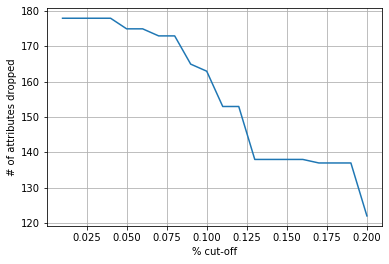

In [17]:
plt.plot(xaxis,yaxis)
plt.grid(True)
plt.xlabel('% cut-off')
plt.ylabel('# of attributes dropped')
plt.savefig('/Users/jinchenxie/Desktop/HF_Research/Plots/attributes_NA_cutoff')
plt.show()

In [143]:
critical_cutoff = [0.01, 0.05, 0.10, 0.15, 0.20]

In [144]:
critical_cutoff

[0.01, 0.05, 0.1, 0.15, 0.2]

In [145]:
baseline['TOBACCO_STATUS_LABEL'].value_counts()

QUIT (UNKNOWN TIMEFRAME)        5216
NEVER                           4579
CURRENT                         1181
REMOTE (MORE THAN 12 MONTHS)     502
RECENT (WITHIN 12 MONTHS)        425
UNKNOWN                          266
NEVER ASKED                       82
PASSIVE                           34
Name: TOBACCO_STATUS_LABEL, dtype: int64

In [149]:
attri_dropped_01 = list(attribute_NA.loc[attribute_NA['%_NA'] > 0.01].index)
attri_dropped_05 = list(attribute_NA.loc[attribute_NA['%_NA'] > 0.05].index)
attri_dropped_10 = list(attribute_NA.loc[attribute_NA['%_NA'] > 0.10].index)
attri_dropped_15 = list(attribute_NA.loc[attribute_NA['%_NA'] > 0.15].index)
attri_dropped_20 = list(attribute_NA.loc[attribute_NA['%_NA'] > 0.20].index)

In [139]:
literature_predictors = ['BUN','TOBACCO_STATUS_LABEL','HOSP_NA','HOSP_CR','HOSP_BILI','AGE_ADMISSION',
                         'AGE_OFFICE_VISIT',
                         'FEMALE', 'WEIGHT_KG','BP_SYSTOLIC','FINANCIAL_CLASS_CODE',
                        'COPD_HST','CIRRHOSIS_HST','ELIX_LIVER_DISEASE',
                        'ELIX_METASTATIC_CANCER','CCI_CEREBROVASCULAR',
                        'CCI_DEMENTIA','CCI_MILD_LIVER_DISEASE','CCI_SEVERE_LIVER_DISEASE',
                        'HGB','CR','NA','GLUCOSE','BILI','PA_SATURATION', 'CCI_COPD','ELIX_OBESITY']

In [12]:
len(literature_predictors)

26

In [140]:
print(literature_predictors)

['BUN', 'TOBACCO_STATUS_LABEL', 'HOSP_NA', 'HOSP_CR', 'HOSP_BILI', 'AGE_ADMISSION', 'AGE_OFFICE_VISIT', 'FEMALE', 'WEIGHT_KG', 'BP_SYSTOLIC', 'FINANCIAL_CLASS_CODE', 'COPD_HST', 'CIRRHOSIS_HST', 'ELIX_LIVER_DISEASE', 'ELIX_METASTATIC_CANCER', 'CCI_CEREBROVASCULAR', 'CCI_DEMENTIA', 'CCI_MILD_LIVER_DISEASE', 'CCI_SEVERE_LIVER_DISEASE', 'HGB', 'CR', 'NA', 'GLUCOSE', 'BILI', 'PA_SATURATION', 'CCI_COPD', 'ELIX_OBESITY']


In [141]:
baseline[literature_predictors].describe()

,BUN,HOSP_NA,HOSP_CR,HOSP_BILI,AGE_ADMISSION,AGE_OFFICE_VISIT,FEMALE,WEIGHT_KG,BP_SYSTOLIC,COPD_HST,CIRRHOSIS_HST,ELIX_LIVER_DISEASE,ELIX_METASTATIC_CANCER,CCI_CEREBROVASCULAR,CCI_DEMENTIA,CCI_MILD_LIVER_DISEASE,CCI_SEVERE_LIVER_DISEASE,HGB,CR,NA,GLUCOSE,BILI,PA_SATURATION,CCI_COPD,ELIX_OBESITY
count,2274.000000,12226.000000,12225.000000,8137.000000,12285.000000,12285.000000,12285.000000,11043.000000,11479.000000,12285.000000,12285.000000,12285.000000,12285.000000,12285.000000,12285.000000,12285.000000,12285.000000,11024.000000,11224.000000,11206.000000,11122.000000,8520.000000,1264.000000,12285.000000,12285.000000
mean,31.521108,140.554171,1.854094,1.025168,73.701669,74.263134,0.497192,84.938874,125.036501,0.232641,0.019617,0.034351,0.009605,0.141311,0.031176,0.028490,0.002605,11.668019,1.582747,138.176165,124.582647,0.841263,56.853639,0.234921,0.126007
std,17.726989,3.695234,1.567555,1.223984,13.918196,13.918740,0.500012,25.990558,20.737281,0.422533,0.138687,0.182136,0.097538,0.348356,0.173801,0.166375,0.050973,2.013648,1.549339,13.292040,52.199261,0.774766,10.402582,0.423966,0.331871
min,5.000000,123.000000,0.180000,0.090000,18.000000,18.100000,0.000000,0.720000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.400000,0.100000,0.000000,12.200000,0.100000,10.000000,0.000000,0.000000
25%,20.000000,139.000000,1.100000,0.500000,65.000000,65.300000,0.000000,66.680000,110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.200000,0.930000,136.000000,94.000000,0.500000,51.000000,0.000000,0.000000
50%,27.000000,141.000000,1.400000,0.800000,76.000000,76.600000,0.000000,80.650000,122.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.600000,1.200000,139.000000,109.000000,0.700000,58.000000,0.000000,0.000000
75%,38.000000,143.000000,2.000000,1.200000,84.000000,85.000000,1.000000,98.430000,138.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1.700000,141.000000,139.000000,1.000000,64.000000,0.000000,0.000000
max,142.000000,179.000000,23.200000,43.700000,105.000000,105.400000,1.000000,297.100000,240.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.500000,67.300000,1471.000000,756.000000,27.100000,93.000000,1.000000,1.000000


In [150]:
for attri in literature_predictors:
    if attri in attri_dropped_01:
        print(attri)

BUN
HOSP_BILI
WEIGHT_KG
BP_SYSTOLIC
HGB
CR
NA
GLUCOSE
BILI
PA_SATURATION


In [151]:
for attri in literature_predictors:
    if attri in attri_dropped_05:
        print(attri)

BUN
HOSP_BILI
WEIGHT_KG
BP_SYSTOLIC
HGB
CR
NA
GLUCOSE
BILI
PA_SATURATION


In [152]:
for attri in literature_predictors:
    if attri in attri_dropped_10:
        print(attri)

BUN
HOSP_BILI
WEIGHT_KG
HGB
BILI
PA_SATURATION


In [153]:
for attri in literature_predictors:
    if attri in attri_dropped_15:
        print(attri)

BUN
HOSP_BILI
BILI
PA_SATURATION


In [154]:
for attri in literature_predictors:
    if attri in attri_dropped_20:
        print(attri)

BUN
HOSP_BILI
BILI
PA_SATURATION


Count the missing values in each patient record

In [197]:
row_NA = []
for i in range(len(baseline.index)):
    row_NA.append(baseline.iloc[i].isnull().sum())
row_NA = pd.Series(row_NA)
row_NA_perc = row_NA/baseline.shape[1]

In [198]:
row_NA = pd.Series(row_NA)

In [199]:
row_NA_perc = row_NA/baseline.shape[1]

In [200]:
patient_NA = pd.concat([baseline['rID'], row_NA, row_NA_perc], axis=1, keys=['rID','num_NA','%_NA'])

In [204]:
patient_NA

,rID,num_NA,%_NA
0,1,102,0.318750
1,2,82,0.256250
2,3,50,0.156250
3,4,59,0.184375
4,5,74,0.231250
...,...,...,...
12280,12281,88,0.275000
12281,12282,50,0.156250
12282,12283,124,0.387500
12283,12284,65,0.203125


### What is the age distribution of CTB==1?

In [162]:
baseline_ctb1 = baseline[baseline['CTB']==1]
baseline_ctb0 = baseline[baseline['CTB']==0]
                         

In [161]:
baseline_ctb1.AGE_ADMISSION.mean()

76.97034596375617

In [164]:
baseline_ctb1.AGE_ADMISSION.std()

12.53107195652711

In [163]:
baseline_ctb0.AGE_ADMISSION.mean()

67.83158852981339

In [165]:
baseline_ctb0.AGE_ADMISSION.std()

14.352584121214404

In [13]:
len(attribute_NA.loc[attribute_NA['num_NA']==0])/baseline.shape[1]

0.378125

In [14]:
len(patient_NA.loc[patient_NA['num_NA']==0])

NameError: name 'patient_NA' is not defined

In [283]:
patient_20 = patient_NA.loc[patient_NA['%_NA']<=0.2]

In [297]:
patient_15 = patient_NA.loc[patient_NA['%_NA']<=0.15]

In [271]:
baseline_pat20 = baseline.iloc[list(patient_20['rID']-1)]

In [298]:
baseline_pat15 = baseline.iloc[list(patient_15['rID']-1)]

In [360]:
baseline_pat20['HTN_HST'].mean()

0.6887445887445888

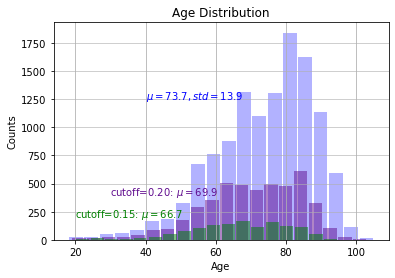

In [319]:
baseline['AGE_ADMISSION'].plot.hist(grid=True, bins=20,alpha=0.3,rwidth=0.9,color='blue')
baseline_pat20['AGE_ADMISSION'].plot.hist(grid=True, bins=20,alpha=0.5,rwidth=0.9,color='#600c8e')
baseline_pat15['AGE_ADMISSION'].plot.hist(grid=True, bins=20,alpha=0.5,rwidth=0.9,color='green')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.text(40,1250,r'$\mu=73.7, std=13.9$',color='blue')
plt.text(30,400,r'cutoff=0.20: $\mu=69.9$',color='#600c8e')
plt.text(20,200,r'cutoff=0.15: $\mu=66.7$',color='green')
plt.grid(axis='y', alpha=0.75)
plt.savefig('diffcut-off_age_distribution')

In [325]:
baseline['FEMALE'].mean()

0.4971916971916972

In [322]:
baseline_pat20['FEMALE'].mean()

0.49393939393939396

In [323]:
baseline_pat15['FEMALE'].mean()

0.4352409638554217

In [324]:
baseline_pat10['FEMALE'].mean()

0.36666666666666664

In [329]:
female_mean = [0.4971916971916972,0.49393939393939396,0.4352409638554217,0.36666666666666664]

In [332]:
male_mean = [1-i for i in female_mean]

In [333]:
male_mean

[0.5028083028083028,
 0.5060606060606061,
 0.5647590361445782,
 0.6333333333333333]

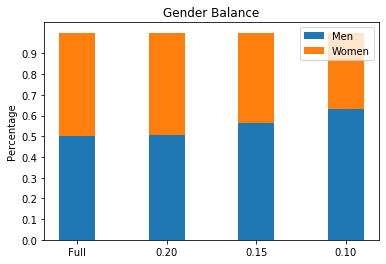

In [339]:
p1= plt.bar(np.arange(4),male_mean, width=0.4)
p2= plt.bar(np.arange(4), female_mean, width=0.4, bottom=male_mean)
plt.ylabel('Percentage')
plt.title('Gender Balance')
plt.xticks(np.arange(4), ('Full', '0.20', '0.15', '0.10'))
plt.yticks(np.arange(0, 1, 0.1))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))
plt.savefig('gender balance')

In [ ]:
female_plt = age_female.plot.hist(grid=True, bins=20, alpha= 0.5,rwidth=0.9,color='#600c8e')
male_plt = age_male.plot.hist(grid=True, bins=20, alpha= 0.6,rwidth=0.9,color='#607c8e')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.text(53,800,r'$\mu=75.6, std=13.7$',color='#600c8e')
plt.text(33,500,r'$\mu=71.8, std=13.9$',color='#607c8e')
plt.grid(axis='y', alpha=0.75)
plt.gca().legend({'Female','Male'})
plt.savefig('age_distribution')

In [33]:
yaxis = []
for i in xaxis:
    yaxis.append(len(patient_NA.loc[patient_NA['%_NA'] > i]))

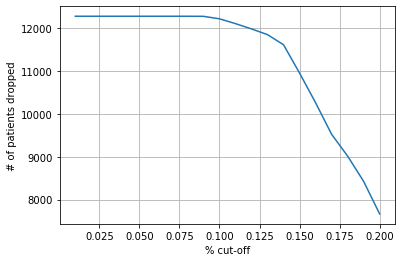

In [34]:
plt.plot(xaxis,yaxis)
plt.grid(True)
plt.xlabel('% cut-off')
plt.ylabel('# of patients dropped')
plt.savefig('/Users/jinchenxie/Desktop/HF_Research/Plots/patients_NA_cutoff')
plt.show()

In [106]:
baseline.isnull().sum()

rID                                    0
LOS_DAYS                               0
HOSP_CR                               60
HOSP_BILI                           4148
HOSP_INR                            2478
HOSP_NA                               59
HOSP_EGFR                             60
PRIMARY_DIAGNOSIS_CODE                 0
PRIMARY_DIAGNOSIS_DESCRIPTION          0
AGE_ADMISSION                          0
AGE_OFFICE_VISIT                       0
FEMALE                                 0
RACE                                  30
ETHNIC_GROUP                          68
BMI                                 1346
WEIGHT_KG                           1242
ORD                                    0
DAYS_TO_CLOSEST_OFFICE_VISIT           0
DEPARTMENT_NAME                        0
EXTERNAL_DEPARTMENT_NAME              39
DEPARTMENT_SPECIALTY                   0
BP_SYSTOLIC                          806
BP_DIASTOLIC                         844
PULSE                               2070
FINANCIAL_CLASS_

In [118]:
baseline[baseline['SULFONYLUREA_00'].isnull()].rID

4100      4101
5822      5823
6382      6383
8343      8344
10071    10072
11868    11869
Name: rID, dtype: int64

In [125]:
baseline.iloc[baseline[baseline['SULFONYLUREA_00'].isnull()].rID,:].WEIGHT_KG

4101      67.13
5823      86.64
6383        NaN
8344     125.65
10072     59.42
11869       NaN
Name: WEIGHT_KG, dtype: float64

At each cut-off levels, what attributes are being dropped.
Are they important?

## Characteristics of Patients in the Baseline

In [35]:
baseline.shape

(12285, 320)

In [38]:
list(baseline.columns)

['rID',
 'LOS_DAYS',
 'HOSP_CR',
 'HOSP_BILI',
 'HOSP_INR',
 'HOSP_NA',
 'HOSP_EGFR',
 'PRIMARY_DIAGNOSIS_CODE',
 'PRIMARY_DIAGNOSIS_DESCRIPTION',
 'AGE_ADMISSION',
 'AGE_OFFICE_VISIT',
 'FEMALE',
 'RACE',
 'ETHNIC_GROUP',
 'BMI',
 'WEIGHT_KG',
 'ORD',
 'DAYS_TO_CLOSEST_OFFICE_VISIT',
 'DEPARTMENT_NAME',
 'EXTERNAL_DEPARTMENT_NAME',
 'DEPARTMENT_SPECIALTY',
 'BP_SYSTOLIC',
 'BP_DIASTOLIC',
 'PULSE',
 'FINANCIAL_CLASS_CODE',
 'FINANCIAL_CLASS',
 'HOSP_ROLLUP_GROUPING1',
 'HOSP_ROLLUP_GROUPING2',
 'DC_MILRINONE',
 'DC_DOBUTAMINE',
 'DC_DOPAMINE',
 'LVEF',
 'CLOSEST_LVEF_DAYS',
 'RV_FUNC',
 'CLOSEST_RV_FUNC_DAYS',
 'AR',
 'CLOSEST_AR_DAYS',
 'MR',
 'CLOSEST_MR_DAYS',
 'PR',
 'CLOSEST_PR_DAYS',
 'TR',
 'CLOSEST_TR_DAYS',
 'AS',
 'CLOSEST_AS_DAYS',
 'MS',
 'CLOSEST_MS_DAYS',
 'PS',
 'CLOSEST_PS_DAYS',
 'TS',
 'CLOSEST_TS_DAYS',
 'PRE_CRT',
 'PRE_CRT_DAYS',
 'PRIOR_STERNOTOMY',
 'PRE_VAD',
 'PRE_VAD_DAYS',
 'PRE_TRANSPLANT',
 'PRE_TRANSPLANT_DAYS',
 'PRIOR_PCI',
 'PRIOR_PCI_DAYS',
 'PRIOR_CA

In [69]:
baseline['TOBACCO_STATUS_LABEL'].describe()

count                        12285
unique                           8
top       QUIT (UNKNOWN TIMEFRAME)
freq                          5216
Name: TOBACCO_STATUS_LABEL, dtype: object

In [127]:
baseline['FEMALE'].value_counts()

0    6177
1    6108
Name: FEMALE, dtype: int64

In [128]:
baseline['AGE_ADMISSION']

0        82
1        91
2        76
3        66
4        51
         ..
12280    68
12281    77
12282    84
12283    83
12284    56
Name: AGE_ADMISSION, Length: 12285, dtype: int64

In [129]:
age_female = baseline.loc[baseline['FEMALE']==1]['AGE_ADMISSION']
age_male = baseline.loc[baseline['FEMALE']==0]['AGE_ADMISSION']

In [130]:
len(age_female)

6108

In [133]:
len(age_male)

6177

In [187]:
ctb1 = baseline_ctb1['AGE_ADMISSION']
ctb0 = baseline_ctb0['AGE_ADMISSION']

In [180]:
len(ctb0)

4394

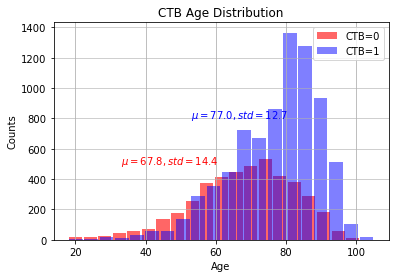

In [195]:
ctb0.plot.hist(grid=True, bins=20, alpha= 0.6,rwidth=0.9,color='red')
ctb1.plot.hist(grid=True, bins=20, alpha= 0.5,rwidth=0.9,color='blue')
plt.title('CTB Age Distribution')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.text(53,800,r'$\mu=77.0, std=12.7$',color='blue')
plt.text(33,500,r'$\mu=67.8, std=14.4$',color='red')
plt.grid(axis='y', alpha=0.75)
plt.gca().legend({'CTB=0','CTB=1'})
plt.savefig('CTB_age_distribution')

In [134]:
age_gender

NameError: name 'age_gender' is not defined

In [135]:
type(age_female)

pandas.core.series.Series

In [189]:
age = pd.Series(baseline['AGE_ADMISSION'])

In [136]:
age_female.mean()

75.62246234446627

In [137]:
age_male.mean()

71.80233122875183

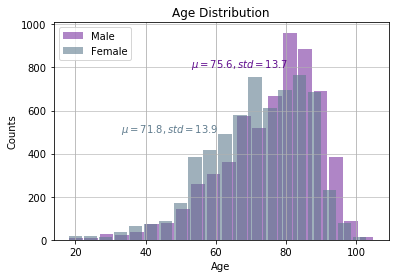

In [261]:
female_plt = age_female.plot.hist(grid=True, bins=20, alpha= 0.5,rwidth=0.9,color='#600c8e')
male_plt = age_male.plot.hist(grid=True, bins=20, alpha= 0.6,rwidth=0.9,color='#607c8e')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.text(53,800,r'$\mu=75.6, std=13.7$',color='#600c8e')
plt.text(33,500,r'$\mu=71.8, std=13.9$',color='#607c8e')
plt.grid(axis='y', alpha=0.75)
plt.gca().legend({'Female','Male'})
plt.savefig('age_distribution')

In [ ]:
age.plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.text(33,1100,r'$\mu=73.7, std=13.9$')
plt.grid(axis='y', alpha=0.75)
plt.savefig('gender_age_distribution')

In [66]:
baseline['TOBACCO_STATUS'].value_counts()

 2    5216
 0    4579
 5    1181
 3     502
 4     425
-9     266
-7      82
 1      34
Name: TOBACCO_STATUS, dtype: int64

In [67]:
baseline['TOBACCO_STATUS_LABEL'].value_counts()

QUIT (UNKNOWN TIMEFRAME)        5216
NEVER                           4579
CURRENT                         1181
REMOTE (MORE THAN 12 MONTHS)     502
RECENT (WITHIN 12 MONTHS)        425
UNKNOWN                          266
NEVER ASKED                       82
PASSIVE                           34
Name: TOBACCO_STATUS_LABEL, dtype: int64

In [74]:
382/12285

0.031094831094831094

In [77]:
full_baseline = baseline.dropna(axis=1)

In [78]:
full_baseline.shape

(12285, 121)

In [129]:
list(full_baseline.columns)

['rID',
 'LOS_DAYS',
 'PRIMARY_DIAGNOSIS_CODE',
 'PRIMARY_DIAGNOSIS_DESCRIPTION',
 'AGE_ADMISSION',
 'AGE_OFFICE_VISIT',
 'FEMALE',
 'ORD',
 'DAYS_TO_CLOSEST_OFFICE_VISIT',
 'DEPARTMENT_NAME',
 'DEPARTMENT_SPECIALTY',
 'FINANCIAL_CLASS_CODE',
 'FINANCIAL_CLASS',
 'HOSP_ROLLUP_GROUPING1',
 'HOSP_ROLLUP_GROUPING2',
 'PRE_CRT',
 'PRIOR_STERNOTOMY',
 'PRE_VAD',
 'PRE_TRANSPLANT',
 'PRIOR_PCI',
 'PRIOR_CABG',
 'PRIOR_TAVR',
 'PRIOR_SAVR_MECH',
 'PRIOR_SAVR_BIO',
 'PRIOR_SURG_AO_GRFT',
 'PRIOR_ENDO_AO_GRFT',
 'PRIOR_AO_VLV_REPAIR',
 'PRIOR_SMVR',
 'PRIOR_SPVR',
 'PRIOR_STVR',
 'HTN_HST',
 'HYPERLIPIDEMIA_HST',
 'DIAB_HST',
 'COPD_HST',
 'CAD_HST',
 'CHF_HST',
 'AFIB_HST',
 'PH_HST',
 'PE_HST',
 'CARDIAC_ARREST_HST',
 'VTVF_HST',
 'VASCULARDISEASE_HST',
 'DVT_HST',
 'STROKE_HST',
 'HEMO_STROKE_HST',
 'MAJOR_BLEED_HST',
 'CKD_HST',
 'ESRD_HST',
 'CIRRHOSIS_HST',
 'TOBACCO_STATUS',
 'TOBACCO_STATUS_LABEL',
 'HX_SEPTIC_SHOCK',
 'HX_SEPSIS',
 'HX_CAROTID_OCCLUSION',
 'HF_ETIOLOGY',
 'HF_ETIOLOGY_

In [ ]:
LOS_DAYS

In [82]:
baseline['DEPARTMENT_NAME'].describe()

count           12285
unique            875
top       HVI PUH HBC
freq              785
Name: DEPARTMENT_NAME, dtype: object

In [86]:
12285-3452-2787-2465-455-317-162

2647

In [186]:
baseline[[ 'HTN_HST',
 'HYPERLIPIDEMIA_HST',
 'DIAB_HST',
 'COPD_HST',
 'CAD_HST',
 'CHF_HST',
 'AFIB_HST',
 'PH_HST',
 'PE_HST',
 'CARDIAC_ARREST_HST',
 'VTVF_HST',
 'VASCULARDISEASE_HST',
 'DVT_HST',
 'STROKE_HST',
 'HEMO_STROKE_HST',
 'MAJOR_BLEED_HST',
 'CKD_HST',
 'ESRD_HST',
 'CIRRHOSIS_HST',
 'TOBACCO_STATUS',
 'TOBACCO_STATUS_LABEL',
 'HX_SEPTIC_SHOCK',
 'HX_SEPSIS',
 'HX_CAROTID_OCCLUSION',
 'HF_ETIOLOGY',
          'CCI_MI',
 'CCI_CHF',
 'CCI_PERIPHERAL_VASC',
 'CCI_CEREBROVASCULAR',
 'CCI_DEMENTIA',
 'CCI_COPD',
 'CCI_RHEUMATIC_DISEASE',
 'CCI_PEPTIC_ULCER',
 'CCI_MILD_LIVER_DISEASE',
 'CCI_DM_NO_CC',
 'CCI_DM_WITH_CC',
 'CCI_HEMIPLEGIA',
 'CCI_RENAL_DISEASE',
 'CCI_MALIG_NO_SKIN',
 'CCI_SEVERE_LIVER_DISEASE',
 'CCI_MATASTATIC_TUMOR',
 'CCI_AIDS_HIV',
 'CCI_TOTAL_SCORE']].mean()

HTN_HST                     0.671795
HYPERLIPIDEMIA_HST          0.505250
DIAB_HST                    0.384127
COPD_HST                    0.232641
CAD_HST                     0.462841
CHF_HST                     0.578510
AFIB_HST                    0.374278
PH_HST                      0.046968
PE_HST                      0.034188
CARDIAC_ARREST_HST          0.005942
VTVF_HST                    0.065283
VASCULARDISEASE_HST         0.105413
DVT_HST                     0.030199
STROKE_HST                  0.105169
HEMO_STROKE_HST             0.008873
MAJOR_BLEED_HST             0.154416
CKD_HST                     0.156125
ESRD_HST                    0.032886
CIRRHOSIS_HST               0.019617
TOBACCO_STATUS              1.351974
HX_SEPTIC_SHOCK             0.000244
HX_SEPSIS                   0.006919
HX_CAROTID_OCCLUSION        0.055433
HF_ETIOLOGY                -0.291005
CCI_MI                      0.076109
CCI_CHF                     0.513716
CCI_PERIPHERAL_VASC         0.239723
C

In [159]:
for i in [ 'CCI_MI',
 'CCI_CHF',
 'CCI_PERIPHERAL_VASC',
 'CCI_CEREBROVASCULAR',
 'CCI_DEMENTIA',
 'CCI_COPD',
 'CCI_RHEUMATIC_DISEASE',
 'CCI_PEPTIC_ULCER',
 'CCI_MILD_LIVER_DISEASE',
 'CCI_DM_NO_CC',
 'CCI_DM_WITH_CC',
 'CCI_HEMIPLEGIA',
 'CCI_RENAL_DISEASE',
 'CCI_MALIG_NO_SKIN',
 'CCI_SEVERE_LIVER_DISEASE',
 'CCI_MATASTATIC_TUMOR',
 'CCI_AIDS_HIV',
 'CCI_TOTAL_SCORE']:

    print(baseline[i].value_counts())

0    11350
1      935
Name: CCI_MI, dtype: int64
1    6311
0    5974
Name: CCI_CHF, dtype: int64
0    9340
1    2945
Name: CCI_PERIPHERAL_VASC, dtype: int64
0    10549
1     1736
Name: CCI_CEREBROVASCULAR, dtype: int64
0    11902
1      383
Name: CCI_DEMENTIA, dtype: int64
0    9399
1    2886
Name: CCI_COPD, dtype: int64
0    11800
1      485
Name: CCI_RHEUMATIC_DISEASE, dtype: int64
0    11929
1      356
Name: CCI_PEPTIC_ULCER, dtype: int64
0    11935
1      350
Name: CCI_MILD_LIVER_DISEASE, dtype: int64
0    8929
1    3356
Name: CCI_DM_NO_CC, dtype: int64
0    10710
1     1575
Name: CCI_DM_WITH_CC, dtype: int64
0    12209
1       76
Name: CCI_HEMIPLEGIA, dtype: int64
0    9720
1    2565
Name: CCI_RENAL_DISEASE, dtype: int64
0    10592
1     1693
Name: CCI_MALIG_NO_SKIN, dtype: int64
0    12253
1       32
Name: CCI_SEVERE_LIVER_DISEASE, dtype: int64
0    12170
1      115
Name: CCI_MATASTATIC_TUMOR, dtype: int64
0    12269
1       16
Name: CCI_AIDS_HIV, dtype: int64
1     2700
2     24

In [161]:
baseline[['CCI_TOTAL_SCORE']].describe()

,CCI_TOTAL_SCORE
count,12285.000000
mean,2.612780
std,2.039958
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,15.000000


In [144]:
baseline['ELIX_DEPRESSION'].value_counts()

0    10695
1     1590
Name: ELIX_DEPRESSION, dtype: int64

In [187]:
corr_df = baseline[[
'HTN_HST',
 'HYPERLIPIDEMIA_HST',
 'DIAB_HST',
 'COPD_HST',
 'CAD_HST',
 'CHF_HST',
 'AFIB_HST',
 'PH_HST',
 'PE_HST',
 'CARDIAC_ARREST_HST',
 'VTVF_HST',
 'VASCULARDISEASE_HST',
 'DVT_HST',
 'STROKE_HST',
 'HEMO_STROKE_HST',
 'MAJOR_BLEED_HST',
 'CKD_HST',
 'ESRD_HST',
 'CIRRHOSIS_HST',
 'TOBACCO_STATUS',
 'TOBACCO_STATUS_LABEL',
 'HX_SEPTIC_SHOCK',
 'HX_SEPSIS',
 'HX_CAROTID_OCCLUSION',
 'HF_ETIOLOGY',
     'CCI_MI',
 'CCI_CHF',
 'CCI_PERIPHERAL_VASC',
 'CCI_CEREBROVASCULAR',
 'CCI_DEMENTIA',
 'CCI_COPD',
 'CCI_RHEUMATIC_DISEASE',
 'CCI_PEPTIC_ULCER',
 'CCI_MILD_LIVER_DISEASE',
 'CCI_DM_NO_CC',
 'CCI_DM_WITH_CC',
 'CCI_HEMIPLEGIA',
 'CCI_RENAL_DISEASE',
 'CCI_MALIG_NO_SKIN',
 'CCI_SEVERE_LIVER_DISEASE',
 'CCI_MATASTATIC_TUMOR',
 'CCI_AIDS_HIV',
 'CCI_TOTAL_SCORE'
 ]]

In [163]:
type(corr_df)

pandas.core.frame.DataFrame

In [167]:
%cd ../Plots

/Users/jinchenxie/Desktop/HF_Research/Plots


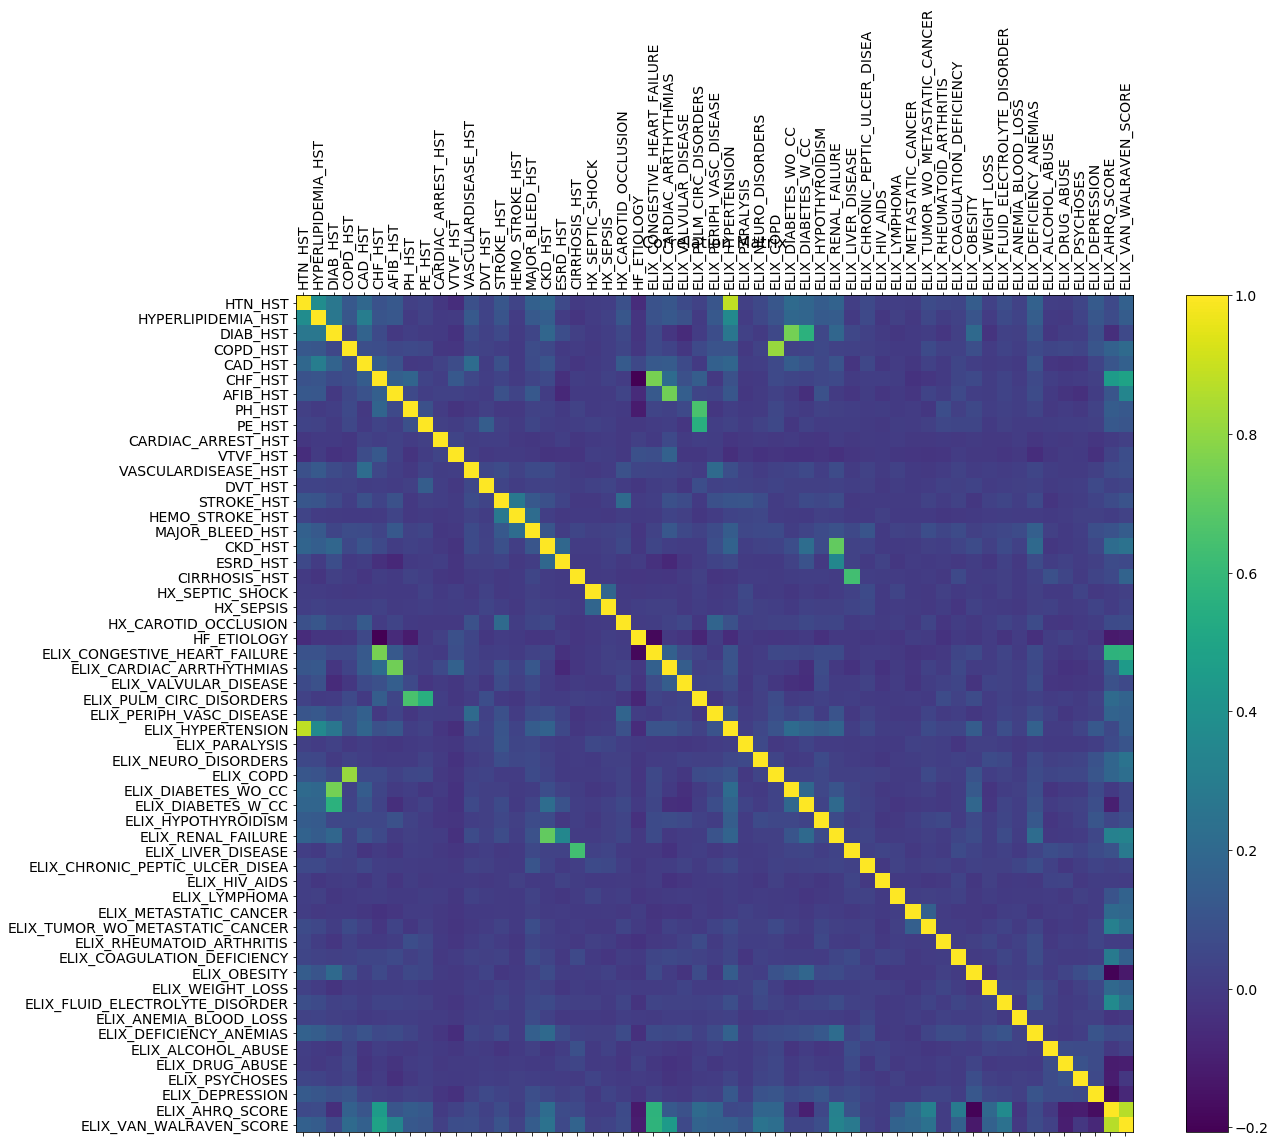

In [181]:
f = plt.figure(figsize=(19, 15))
plt.matshow(corr_df.corr(), fignum=f.number)
plt.xticks(range(corr_df.shape[1]), corr_df.columns, fontsize=14, rotation=90)
plt.yticks(range(corr_df.shape[1]), corr_df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.savefig('correlation_matrix_his_elix')

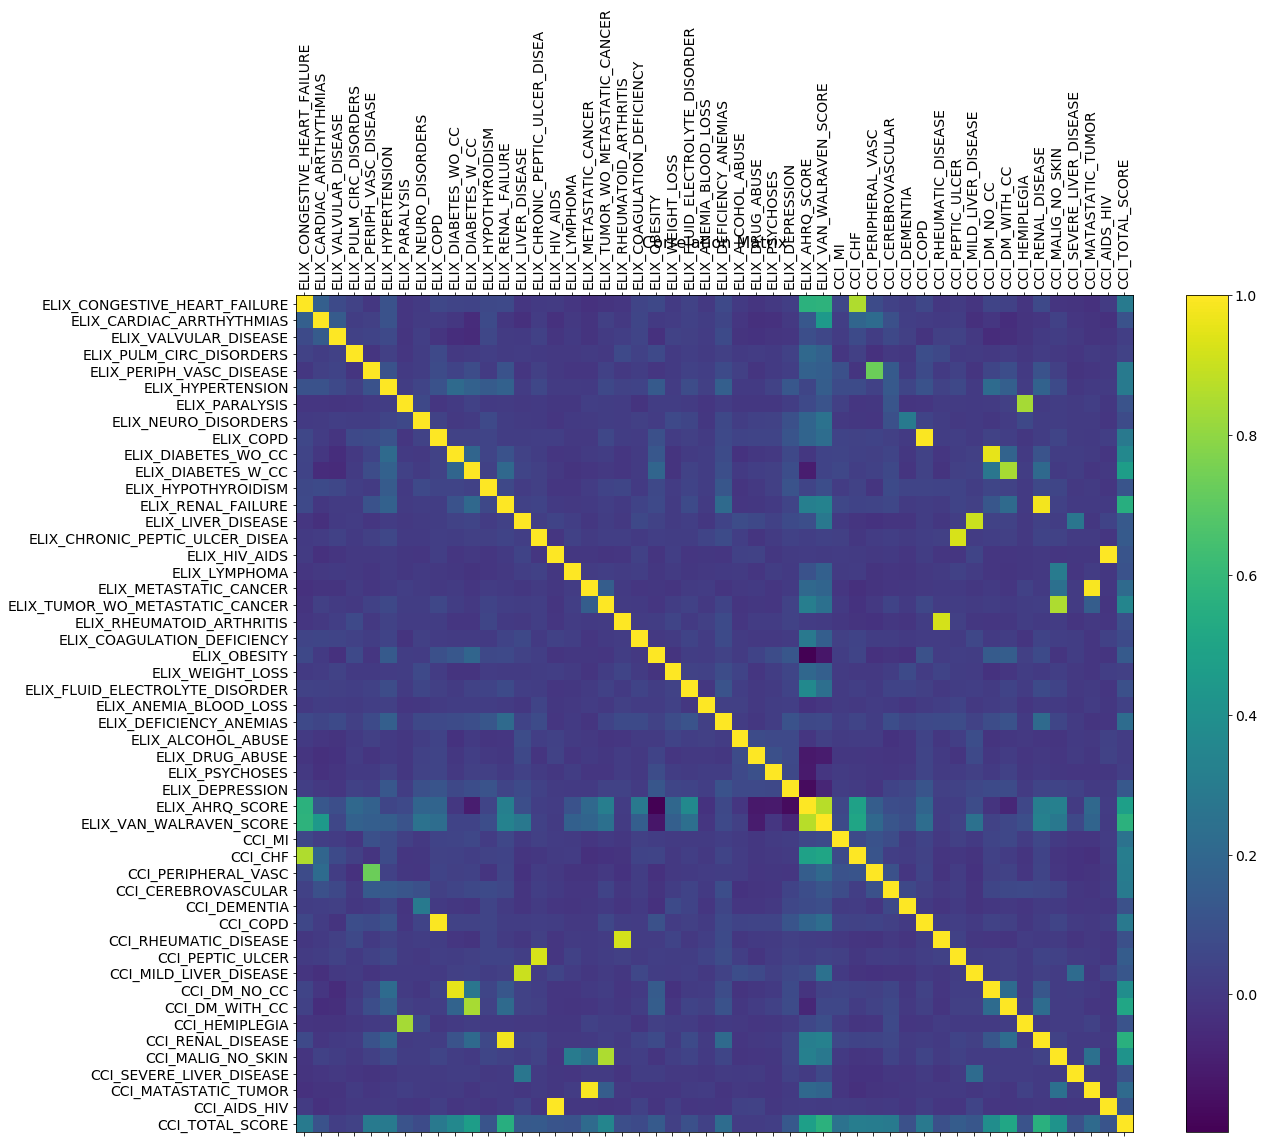

In [183]:
f = plt.figure(figsize=(19, 15))
plt.matshow(corr_df.corr(), fignum=f.number)
plt.xticks(range(corr_df.shape[1]), corr_df.columns, fontsize=14, rotation=90)
plt.yticks(range(corr_df.shape[1]), corr_df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.savefig('correlation_matrix_elix_cci')

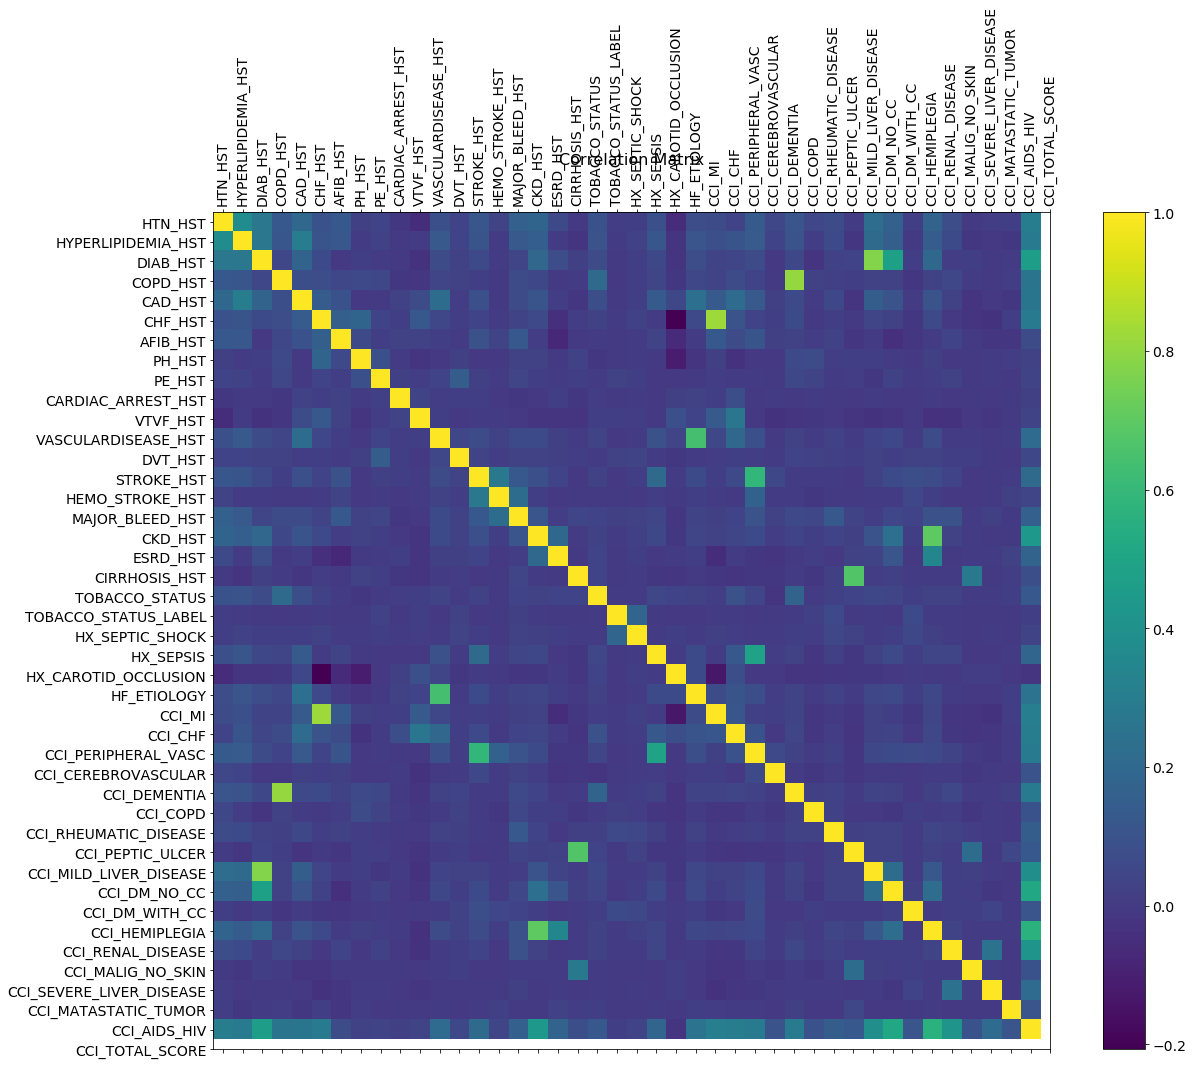

In [188]:
f = plt.figure(figsize=(19, 15))
plt.matshow(corr_df.corr(), fignum=f.number)
plt.xticks(range(corr_df.shape[1]), corr_df.columns, fontsize=14, rotation=90)
plt.yticks(range(corr_df.shape[1]), corr_df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.savefig('correlation_matrix_his_cci')

In [381]:
baseline.shape

(12285, 320)

In [382]:
admission.shape

(55742, 168)

In [217]:
adm_count = pd.Series(admission['rID'].value_counts())

In [218]:
adm_count

5814     113
10356     76
4737      54
6218      52
8806      52
        ... 
11125      1
4068       1
2961       1
12256      1
4199       1
Name: rID, Length: 12285, dtype: int64

In [219]:
pd.Series(adm_count.value_counts().index)

0       1
1       2
2       3
3       4
4       5
5       6
6       7
7       8
8       9
9      10
10     11
11     12
12     13
13     14
14     15
15     16
16     17
17     18
18     19
19     20
20     21
21     23
22     22
23     24
24     25
25     28
26     27
27     26
28     29
29     37
30     45
31     35
32     32
33     39
34     30
35     52
36     43
37     31
38     36
39    113
40     33
41     34
42     54
43     76
dtype: int64

In [220]:
adm_count_df = pd.DataFrame({
    'num_count':list(adm_count.value_counts()), 
    'num_appeared': list(adm_count.value_counts().index)})

In [221]:
adm_count.value_counts()

1      2502
2      2274
3      1854
4      1334
5      1008
6       760
7       575
8       429
9       316
10      264
11      194
12      133
13      118
14      110
15       82
16       62
17       49
18       32
19       30
20       26
21       22
23       16
22       13
24       12
25       10
28        9
27        8
26        8
29        6
37        4
45        3
35        3
32        2
39        2
30        2
52        2
43        2
31        2
36        2
113       1
33        1
34        1
54        1
76        1
Name: rID, dtype: int64

In [415]:
(2502+2274+1854+1334+1008)/baseline.shape[0]

0.7303215303215304

In [223]:
adm_count_df[adm_count_df.num_appeared > 10]

,num_count,num_appeared
10,194,11
11,133,12
12,118,13
13,110,14
14,82,15
15,62,16
16,49,17
17,32,18
18,30,19
19,26,20


In [224]:
adm_count_df[adm_count_df.num_appeared > 5].sum()

num_count       3313
num_appeared    1110
dtype: int64

In [216]:
adm_count_df['num_count'].sum()

12285

In [411]:
(22+16+13+12+10+9+8+8+6+4+3+3+2+2+2+2+2+2+2+1+1+1+1+1)/baseline.shape[0]

0.010826210826210826

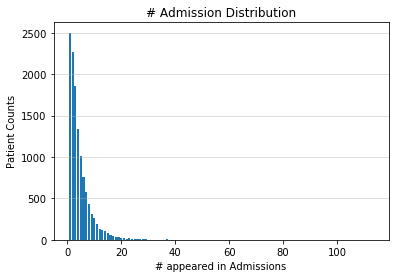

In [410]:
plt.bar(adm_count_df['num_appeared'],adm_count_df['num_count'])
plt.title('# Admission Distribution')
plt.xlabel('# appeared in Admissions')
plt.grid(axis='y', alpha=0.5)
plt.ylabel('Patient Counts')
plt.savefig(' Admission Distribution')

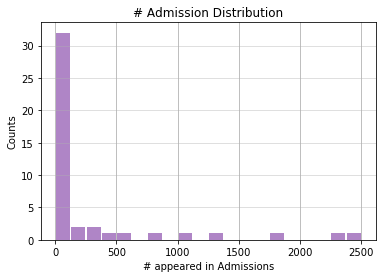

In [393]:
adm_count.value_counts().plot.hist(grid=True, bins=20, alpha= 0.5,rwidth=0.9,color='#600c8e')
plt.title('# Admission Distribution')
plt.xlabel('# appeared in Admissions')
plt.ylabel('Counts')
# plt.text(53,800,r'$\mu=75.6, std=13.7$',color='#600c8e')
# plt.text(33,500,r'$\mu=71.8, std=13.9$',color='#607c8e')
plt.grid(axis='y', alpha=0.5)
plt.xticks(np.arange(), ('Full', '0.20', '0.15', '0.10'))
# plt.gca().legend({'Female','Male'})
plt.savefig(' Admission Distribution')

In [231]:
admission['DISPOSITION'].value_counts()/admission.shape[0]*100

HOME/SELF CARE          33.952854
HOME HEALTH AGENCY      29.493021
SKILLED NURS FACIL      20.946504
CTB                      4.242761
REHAB/INPT REHAB UNT     3.439059
SHORT TERM GEN HOSPT     2.222740
TO HOSPICE/HOME          1.332927
LONG TERM HOSPITAL       1.024362
UNKNOWN                  0.947221
HOSPICE MED FACILITY     0.941839
DISC/XFER TO AN ICF      0.611747
AGAINST MED ADVICE       0.531018
DSC/TR PSY HOSP/UNIT     0.141724
DSC/XFER OTH TYP FAC     0.078935
ELOPED                   0.035880
DO NOT USE               0.035880
CRITICAL ACCESS HOSP     0.007176
DSC/XFER CRT/LAW ENF     0.005382
DSC NUR FAC MA APPR      0.003588
STILL PATIENT            0.001794
TO SWING BED W READM     0.001794
SENT TO OTH CHP DEPT     0.001794
Name: DISPOSITION, dtype: float64

In [228]:
admission['DISPOSITION'].isnull().sum()

0

In [229]:
2365/admission.shape[0]

0.042427612931003555

# use literature review predictors in the model

In [22]:
literature_predictors.remove('FINANCIAL_CLASS_CODE')

In [23]:
literature_predictors.append('HOSP_ROLLUP_GROUPING2')

In [24]:
lit_data = baseline[literature_predictors]

In [25]:
lit_data

,TOBACCO_STATUS_LABEL,HOSP_NA,HOSP_CR,HOSP_BILI,AGE_ADMISSION,AGE_OFFICE_VISIT,FEMALE,WEIGHT_KG,BP_SYSTOLIC,COPD_HST,CIRRHOSIS_HST,ELIX_LIVER_DISEASE,ELIX_METASTATIC_CANCER,CCI_CEREBROVASCULAR,CCI_DEMENTIA,CCI_MILD_LIVER_DISEASE,CCI_SEVERE_LIVER_DISEASE,HGB,CR,NA,GLUCOSE,BILI,PA_SATURATION,CCI_COPD,ELIX_OBESITY,HOSP_ROLLUP_GROUPING2
0,QUIT (UNKNOWN TIMEFRAME),136.0,3.34,NaN,82,82.9,0,84.37,118.0,0,0,0,0,0,0,0,0,9.6,3.28,128.0,82.0,NaN,NaN,0,0,Medicare
1,NEVER,136.0,1.40,2.80,91,91.6,0,60.65,110.0,0,0,0,0,0,0,0,0,10.9,1.00,137.0,109.0,0.7,NaN,0,0,Medicare
2,NEVER,141.0,2.76,2.10,76,76.9,0,80.29,100.0,0,0,0,0,0,0,0,0,10.2,2.30,137.0,108.0,2.1,NaN,0,1,Medicare
3,QUIT (UNKNOWN TIMEFRAME),139.0,1.89,NaN,66,66.1,0,90.72,108.0,0,0,0,0,0,0,0,0,9.0,1.84,132.0,107.0,0.9,NaN,0,1,Medicare
4,CURRENT,141.0,1.04,1.00,51,51.3,0,153.77,140.0,0,0,0,0,0,0,0,0,12.2,NaN,141.0,142.0,NaN,NaN,0,0,Commercial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12280,QUIT (UNKNOWN TIMEFRAME),137.0,0.93,NaN,68,68.2,0,117.03,90.0,0,0,0,0,0,0,0,0,9.5,0.69,133.0,90.0,NaN,NaN,0,1,Medicare
12281,NEVER,143.0,1.20,1.22,77,77.3,1,70.76,148.0,1,0,0,0,0,0,0,0,14.1,1.11,140.0,95.0,1.0,NaN,0,0,Medicare
12282,NEVER,147.0,3.46,2.20,84,85.0,0,79.38,131.0,0,0,0,0,0,0,0,0,10.0,3.21,140.0,171.0,1.7,NaN,0,0,Medicare
12283,REMOTE (MORE THAN 12 MONTHS),146.0,1.10,NaN,83,82.4,1,NaN,90.0,1,0,0,0,0,1,0,0,12.4,0.90,140.0,139.0,NaN,NaN,1,0,Medicare


In [28]:
lit_data.isnull().sum()

TOBACCO_STATUS_LABEL            0
HOSP_NA                        59
HOSP_CR                        60
HOSP_BILI                    4148
AGE_ADMISSION                   0
AGE_OFFICE_VISIT                0
FEMALE                          0
WEIGHT_KG                    1242
BP_SYSTOLIC                   806
COPD_HST                        0
CIRRHOSIS_HST                   0
ELIX_LIVER_DISEASE              0
ELIX_METASTATIC_CANCER          0
CCI_CEREBROVASCULAR             0
CCI_DEMENTIA                    0
CCI_MILD_LIVER_DISEASE          0
CCI_SEVERE_LIVER_DISEASE        0
HGB                          1261
CR                           1061
NA                           1079
GLUCOSE                      1163
BILI                         3765
PA_SATURATION               11021
CCI_COPD                        0
ELIX_OBESITY                    0
HOSP_ROLLUP_GROUPING2           0
dtype: int64

In [40]:
lit_data_sub = lit_data.dropna(axis=1)

In [72]:
lit_data_sub.shape

(12285, 14)

In [42]:
lit_data_sub = lit_data_sub.drop(columns = ['AGE_OFFICE_VISIT'])

In [71]:
lit_data_sub.describe()

,AGE_ADMISSION,FEMALE,COPD_HST,CIRRHOSIS_HST,ELIX_LIVER_DISEASE,ELIX_METASTATIC_CANCER,CCI_CEREBROVASCULAR,CCI_DEMENTIA,CCI_MILD_LIVER_DISEASE,CCI_SEVERE_LIVER_DISEASE,CCI_COPD,ELIX_OBESITY
count,12285.000000,12285.000000,12285.000000,12285.000000,12285.000000,12285.000000,12285.000000,12285.000000,12285.000000,12285.000000,12285.000000,12285.000000
mean,0.640249,0.497192,0.232641,0.019617,0.034351,0.009605,0.141311,0.031176,0.028490,0.002605,0.234921,0.126007
std,0.159979,0.500012,0.422533,0.138687,0.182136,0.097538,0.348356,0.173801,0.166375,0.050973,0.423966,0.331871
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.540230,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.758621,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
# Normalize 'AGE_ADMISSION'
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [64]:
age = lit_data_sub.AGE_ADMISSION
age_normalized = (age - age.min())/(age.max() - age.min())

In [66]:
lit_data_sub['AGE_ADMISSION'] = age_normalized

In [68]:
lit_data_sub.columns

Index(['TOBACCO_STATUS_LABEL', 'AGE_ADMISSION', 'FEMALE', 'COPD_HST',
       'CIRRHOSIS_HST', 'ELIX_LIVER_DISEASE', 'ELIX_METASTATIC_CANCER',
       'CCI_CEREBROVASCULAR', 'CCI_DEMENTIA', 'CCI_MILD_LIVER_DISEASE',
       'CCI_SEVERE_LIVER_DISEASE', 'CCI_COPD', 'ELIX_OBESITY',
       'HOSP_ROLLUP_GROUPING2'],
      dtype='object')

In [69]:
lit_data_sub.TOBACCO_STATUS_LABEL.value_counts()

QUIT (UNKNOWN TIMEFRAME)        5216
NEVER                           4579
CURRENT                         1181
REMOTE (MORE THAN 12 MONTHS)     502
RECENT (WITHIN 12 MONTHS)        425
UNKNOWN                          266
NEVER ASKED                       82
PASSIVE                           34
Name: TOBACCO_STATUS_LABEL, dtype: int64

In [73]:
lit_data_sub.HOSP_ROLLUP_GROUPING2.value_counts()

Medicare        10045
Commercial       1310
Medicaid          798
Self Pay/ Ot      132
Name: HOSP_ROLLUP_GROUPING2, dtype: int64

In [94]:
import sklearn.model_selection as model_selection
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize

In [77]:
X_numeric = lit_data_sub.drop(columns = ['HOSP_ROLLUP_GROUPING2','TOBACCO_STATUS_LABEL'])

In [95]:
y = label_binarize(baseline['CTB'],classes=[0,1])

In [97]:
# If we don't include these two categorical variables
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_numeric, y, 
                                        train_size=0.80, test_size=0.20, random_state=101)

In [98]:
model_lr = LogisticRegressionCV(10, max_iter=900)
model_lr.fit(X_train, y_train)

/Users/jinchenxie/miniconda3/envs/research_env/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jinchenxie/miniconda3/envs/research_env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=900, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [99]:
LR_predicted = model_lr.predict(X_test)
LR_accuracy = accuracy_score(y_test, LR_predicted)

In [100]:
print('the Logistic Regression prediction has accuracy', LR_accuracy)

the Logistic Regression prediction has accuracy 0.6853886853886854
